In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img= Input(shape=(784,))


In [4]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
autoencoder=Model(input_img, decoded)

In [6]:
encoder = Model(input_img, encoded)

In [7]:
autoencoder.summary(0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

In [8]:
encoder.summary(0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 206us/step - loss: 0.2537 - acc: 0.7834 - val_loss: 0.1767 - val_acc: 0.8014
Epoch 2/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1564 - acc: 0.8038 - val_loss: 0.1409 - val_acc: 0.8064
Epoch 3/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1343 - acc: 0.8081 - val_loss: 0.1269 - val_acc: 0.8090
Epoch 4/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1240 - acc: 0.8098 - val_loss: 0.1189 - val_acc: 0.8093
Epoch 5/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1180 - acc: 0.8107 - val_loss: 0.1149 - val_acc: 0.8096
Epoch 6/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1139 - acc: 0.8112 - val_loss: 0.1109 - val_acc: 0.8110
Epoch 7/50
60000/60000 [==============================] - 6s 98us/step - loss

In [11]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

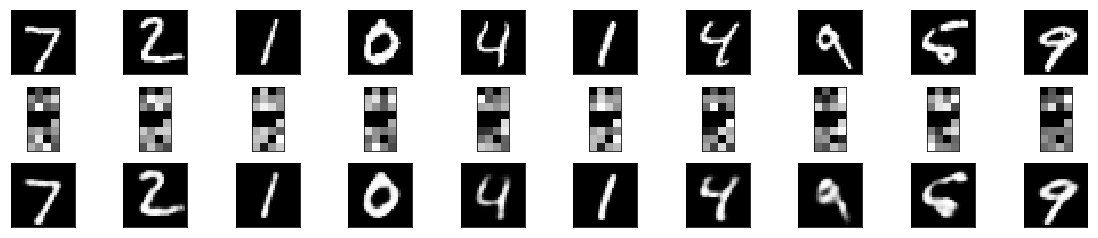

In [12]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [13]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
X_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test + np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
print(X_train_noisy.shape)
print(X_test_noisy.shape)

(60000, 784)
(10000, 784)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.5887 - acc: 0.4062 - val_loss: 0.5647 - val_acc: 0.4303
Epoch 2/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.5645 - acc: 0.4308 - val_loss: 0.5641 - val_acc: 0.4305
Epoch 3/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.5639 - acc: 0.4311 - val_loss: 0.5636 - val_acc: 0.4308
Epoch 4/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.5634 - acc: 0.4316 - val_loss: 0.5630 - val_acc: 0.4315
Epoch 5/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.5625 - acc: 0.4324 - val_loss: 0.5617 - val_acc: 0.4328
Epoch 6/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.5605 - acc: 0.4346 - val_loss: 0.5587 - val_acc: 0.4363
Epoch 7/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.5573 - acc: 0.4382 - val_loss: 0.5555 -

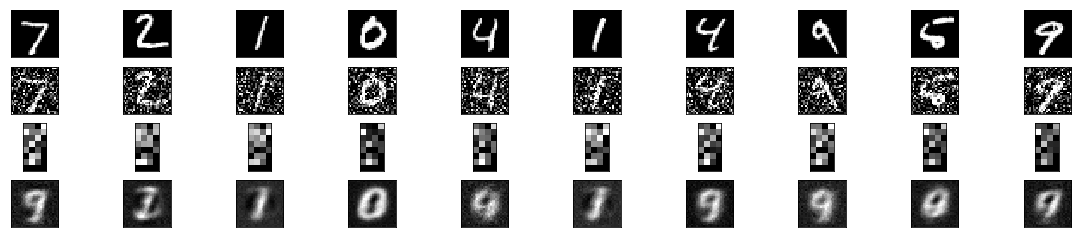

In [15]:
input_img= Input(shape=(784,))
# encoded and decoded layer for the autoencoder
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)
# Building autoencoder
autoencoder=Model(input_img, decoded)
#extracting encoder
encoder = Model(input_img, encoded)
# compiling the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the noise trained data to the autoencoder 
autoencoder.fit(X_train_noisy, X_train_noisy,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test_noisy))
# reconstructing the image from autoencoder and encoder
encoded_imgs = encoder.predict(X_test_noisy)
predicted = autoencoder.predict(X_test_noisy)
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display encoded images    
    ax = plt.subplot(4, 20, 2*20+i + 1 )
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstruction images
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()
